## Confronting Confounding

### Elemental Confounds

* Fork: $X \leftarrow Z \rightarrow Y$
* Pipe: $X \rightarrow Z \rightarrow Y$
* Collider: $X \rightarrow Z \leftarrow Y$
* Descendant: 

In [1]:
import matplotlib.pyplot as plt
from causalgraphicalmodels import CausalGraphicalModel


fork = CausalGraphicalModel(
    nodes=["X", "Y", "Z"],
    edges=[
        ("Z", "X"), 
        ("Z", "Y")
    ]
)

pipe = CausalGraphicalModel(
    nodes=["X", "Y", "Z"],
    edges=[
        ("X", "Z"), 
        ("Z", "Y")
    ]
)


collider = CausalGraphicalModel(
    nodes=["X", "Y", "Z"],
    edges=[
        ("X", "Z"), 
        ("Y", "Z")
    ]
)

desc = CausalGraphicalModel(
    nodes=["X", "Y", "Z", "D"],
    edges=[
        ("X", "Z"), 
        ("Y", "Z"), 
        ("Z", "D")
    ]
)

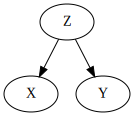

In [2]:
fork.draw()

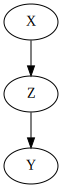

In [3]:
pipe.draw()

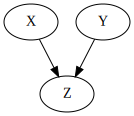

In [4]:
collider.draw()

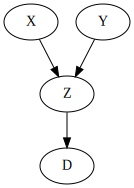

In [5]:
desc.draw()

## Example 6.4.2

The following code was lifted from https://github.com/pymc-devs/resources/blob/master/Rethinking_2/Chp_06.ipynb who, in turn, credit https://ksachdeva.github.io/rethinking-tensorflow-probability/

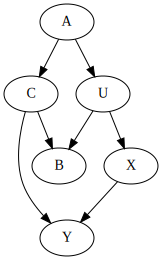

In [6]:
dag_6_1 = CausalGraphicalModel(
    nodes=["X", "Y", "C", "U", "B", "A"],
    edges=[
        ("X", "Y"),
        ("U", "X"),
        ("A", "U"),
        ("A", "C"),
        ("C", "Y"),
        ("U", "B"),
        ("C", "B"),
    ],
)

dag_6_1.draw() 

In [7]:
all_adjustment_sets = dag_6_1.get_all_backdoor_adjustment_sets("X", "Y")
for s in all_adjustment_sets:
    if all(not t.issubset(s) for t in all_adjustment_sets if t != s):
        if s != {"U"}:
            print(s)

frozenset({'C'})
frozenset({'A'})
